# L3: Text clustering and topic modelling

**Contributers:**  
Mim Kemal Tekin (mimte666)  
Andreas Stasinakis (andst475)

Text clustering groups documents in such a way that documents within a group are more &lsquo;similar&rsquo; to other documents in the cluster than to documents not in the cluster. The exact definition of what &lsquo;similar&rsquo; means in this context varies across applications and clustering algorithms.

In this lab you will experiment with both hard and soft clustering techniques. More specifically, in the first part you will be using the $k$-means algorithm, and in the second part you will be using a topic model based on the Latent Dirichlet Allocation (LDA).

## Hard clustering data set

The raw data for the hard clustering part of this lab is a collection of product reviews. We have preprocessed the data by tokenization and lowercasing.

In [1]:
import pandas as pd
import numpy as np
import bz2

with bz2.open("reviews.json.bz2") as source:
    df = pd.read_json(source)
    


In [2]:
df.head()

,category,sentiment,text
0,music,neg,i bought this album because i loved the title ...
1,music,neg,i was misled and thought i was buying the enti...
2,books,neg,"i have introduced many of my ell , high school..."
3,books,pos,anything you purchase in the left behind serie...
4,dvd,pos,"i loved these movies , and i cant wiat for the..."


In [3]:
df["category"].unique()


array(['music', 'books', 'dvd', 'camera', 'health', 'software'],
      dtype=object)

In [4]:
df["category"].value_counts()

books       2000
health      2000
music       2000
dvd         2000
camera      1999
software    1915
Name: category, dtype: int64

When you inspect the data frame, you can see that there are three labelled columns: `category` (the product category), `sentiment` (whether the product review was classified as &lsquo;positive&rsquo; or &lsquo;negative&rsquo; towards the product), and `text` (the space-separated text of the review).

## Problem 1: K-means clustering

Your first task is to cluster the product review data using a tf–idf vectorizer and a $k$-means clusterer.

Start by doing the vectorization. In connection with vectorization, you should also filter out standard English stop words. While you could use [spaCy](https://spacy.io/) for this task, here it suffices to use the word list implemented in [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

### PREPROCESSING - VECTORIZATION 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
#Here the data has already preprocessed for lower case and tokenazation.
#Therefore we just need to use stop words in the vectorizer
vectorizer = TfidfVectorizer(stop_words = "english")
reviews = vectorizer.fit_transform(df["text"])

Test your vectorization by running the following code cell:

In [7]:
reviews.shape

(11914, 46619)

If you used the English stop word list from scikit-learn, then the resulting vocabulary should have 46,619 entries.

Next, cluster the vectorized data. Before doing so, you should read the documentation of the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class, which is scikit-learn&rsquo;s implementation of the $k$-means algorithm. As you can see, this class has several parameters that you can tweak. For now, the only parameter that you will have to set is the number of clusters. We recommend that you choose $k=3$.

**Tip:** Training $k$-means models will take some time. To speed things up, you can use the `n_init` parameter to control the number of times that the clustering is re-computed with different initial values. The default value for this parameter is 10; here and in the rest of this lab, you may want to set this to a lower value.

### Fit Kmeans 

In [8]:
from sklearn.cluster import KMeans


In [9]:
#Create the K means classifier
Nclus = 3 #number of clusters MUST pre defined for K means algo
n_init = 5 #number of restarting the algorithm
kmeans_3 = KMeans(n_clusters=Nclus,
                n_init= n_init,
                random_state = 12345)

#fit the classifier with the data
kmeans_3.fit(reviews)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

In [10]:
#We now use it for 6 clusters
#Create the K means classifier
Nclus = 6
n_init = 5
kmeans_6 = KMeans(n_clusters=Nclus
                  ,n_init= n_init, 
                  random_state = 12345)

#fit the classifier with the data
kmeans_6.fit(reviews)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

To sanity-check your clustering, create a bar plot with the number of documents per cluster.

### Ploting the 3 clusters

In [11]:
import matplotlib.pyplot as plt
x = np.unique(kmeans_3.labels_,return_counts=True)[0]
y = np.unique(kmeans_3.labels_,return_counts=True)[1]


plt.bar(x, y, color='blue', edgecolor='white',width = 0.5)

plt.xlabel('Clusters', fontweight='bold')

plt.title("Text in each Cluster", y=1.02)
plt.show()


<Figure size 640x480 with 1 Axes>

Note that sizes may vary considerable between clusters and among different random seeds.

## Problem 2: Summarize clusters

Once you have a clustering, you can try to see whether it is meaningful. One useful technique in that context is to generate a **summary** for each cluster by extracting the $n$ highest-weighted terms from the centroid of each cluster. Your next task is to implement this approach.

**Hint:** You will need to construct an &lsquo;inverted vocabulary&rsquo; that allows you to map from the index of a term back to the original term.

In [12]:
#In this chunk we take the first N indexes of each cluster with highest weight term
#Now we will create a summary for each of the Clusters
#We will extract the most common words from each cluster in order to have an idea for each cluster

n = 15
Nclus = 3  
ind = np.zeros((Nclus,n))

for i in  range( kmeans_3.cluster_centers_.shape[0]):
    
    ind[i] = kmeans_3.cluster_centers_[i].argsort()[::-1][:n]



In [13]:
#List comprehantion for iterating each index
summary = [[vectorizer.get_feature_names()[int(k)] for k in i] for i in ind]
pd.DataFrame(summary)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,like,product,movie,great,just,good,cd,album,use,time,does,did,really,music,work
1,book,read,books,author,reading,story,quot,like,just,good,written,did,great,really,people
2,camera,lens,pictures,canon,digital,use,battery,flash,quality,great,case,good,cameras,picture,zoom


In [14]:
Nclus = 6
n = 10
  
ind = np.zeros((Nclus,n))

for i in  range( kmeans_6.cluster_centers_.shape[0]):
    
    ind[i] = kmeans_6.cluster_centers_[i].argsort()[::-1][:n]

#List comprehantion for iterating each index
summary_K6 = [[vectorizer.get_feature_names()[int(k)] for k in i] for i in ind]
pd.DataFrame(summary_K6)


,0,1,2,3,4,5,6,7,8,9
0,movie,film,movies,like,story,watch,just,good,great,acting
1,book,read,books,author,reading,story,like,quot,just,written
2,camera,lens,pictures,canon,use,digital,flash,battery,quality,great
3,software,program,product,version,use,computer,support,windows,easy,microsoft
4,product,great,good,like,use,just,does,hair,time,did
5,album,cd,music,songs,quot,song,like,just,great,band


Once you have computed the cluster summaries, discuss their quality. Is it clear what the reviews in a given cluster are about? Which clusters are clearest? Which are less clear? Do the cluster summaries contain any unexpected terms? What happens if you re-cluster with, say, $k=6$?

### Analysis

In that specific problem, we have the class for each review. In that way, we can see in advance that the number of clusters is 6. Therefore, we are expecting that K = 3 may combine different "similar" classes together.  

When we use 3 clusters, the model is not able to seperate the category "Dvd" and "Music". The two other clusters can be easily classified as the "Book" and "Camera". It is clear that the algorithm can not capture the classes "Software" and "Health" though.

On the other hand, when we use 6 clusters(which is the real number of the clusters), all of the classes are easily recognissed.

We could also do the lemmatation in the pre processing procedure in order to avoid repetation of some words like did and does.

## Problem 3: Tune the k-means algorithm

A major limitation of the $k$-means algorithm is that one has to manually set the value for $k$, the number of clusters. One heuristic that can help you with this is the [Elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Your next task is to implement this method to see whether it allows you to find a better value for $k$.

To follow the elbow method, you should plot different values of $k$ against the **inertia** (sums of squared distances between documents and closest centroids) of the fitted $k$-means model, and pick the $k$ at the &lsquo;elbow point&rsquo; of the resulting graph. Test cluster sizes between 1 and 9.

**Note that this will take a while.**

### Calculating the Intertias Scores for different K

In [15]:
#import numpy as np
#We now use the Elbow method
#We will run the algorithm many times
K = 9
Intertias = np.zeros(K)

r = 0
for i in range(1,K+1):
    Intertias[r] = KMeans(n_clusters= i,n_init= 5, random_state = 12345).fit(reviews).inertia_
    r = r + 1


In [16]:
Intertias


array([11764.20258591, 11696.56159235, 11652.42954528, 11614.2159932 ,
       11578.79453702, 11552.6884815 , 11525.75879495, 11490.98972428,
       11478.909646  ])

### Plot number of clusters vs Intertia Scores

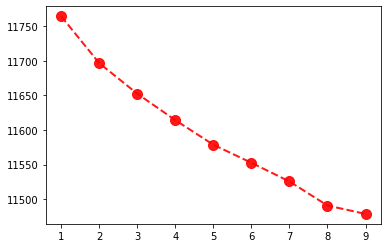

In [17]:
x = [i for i in range(1,10)]

plt.plot(x,Intertias, color = "red" ,marker='o', linestyle='dashed',linewidth = 2,markersize = 10,alpha = 0.9)
plt.show()

Once you have the diagram, can you see a pronounced &lsquo;elbow point&rsquo;? Discuss your findings in a short text.

As mentioned before, the true number of classes is 6. Therefore, somenone would expect that the elbow point will be for K = 6. From the plot though, the above statement is not so clear because also K = 8 seems to be good elbow point using the Intertias scores, after that it seems overfitting.

## Problem 4: Compare clusterings using the Rand index

In some scenarios, you may have gold-standard class labels available for at least a subset of your documents. In these cases you can compute the **Rand index** of a clustering, and use this measure to compare the quality of different clusterings.

To compute the Rand index, we view a clustering as a binary classifier on pairs of documents. The classifier predicts &lsquo;positive&rsquo; if and only if the two documents belong to the same cluster. The (non-normalized) Rand index of the clustering is the accuracy of this classifier relative to a reference in which a document pair belongs to the &lsquo;positive&rsquo; class if and only if the two documents in the pair have the same gold-standard class label.

Compare a clustering with $k=3$ clusters to a second clustering with $k=6$ clusters. As your evaluation data, use the first 500 documents from the original data set along with their gold-standard categories (from the `category` column). What do you observe? How do you interpret your observations? What arguments can you find against the Rand index as a measure for comparing clusterings?

### Rand Index Function

In [18]:
import itertools

#Gold standard classes
classes = df["category"][0:501]

#The predictions for K = 3
clusters_3 = kmeans_3.predict(reviews[0:501])

#For K = 6
clusters_6 = kmeans_6.predict(reviews[0:501])



In [19]:
#We create a function for the Rand index score

#compare the classes and the prediction
def compare(x):
    res = False
    if x[0] ==x[1]:
        res = True
    return res

def RandIndex(preds,y):
    
    #FIRST STEP
    #Our first step is to go through all combination for both the clusters and classes
    #For each pair, we see if the two elements belong to the same cluster(or class).
    
    #first we have to go pairwise through all combinations of the predictions and see how many of them belong to the same cluster
    clusters = [compare(i) for i in list(itertools.combinations(preds, 2))] #This gives a new classifier with labels TRUE or FALSE
    
    #we do the same for the classes
    classes =  [compare(i) for i in list(itertools.combinations(y, 2))] #This gives the labels of the classifier TRUE or FALSE
     
    #Now we have the predictions of the new classifier and the gold classes. We just need the accuracy of that classifier
    #We use a nested list comprehantion in order to compute the TP + FN. 
    TP_FN = sum([compare(pair) for pair in [[clusters[i],classes[i]] for i in (range(0,len(clusters)))]])
    
    #accuracy
    randIndex = TP_FN/len(clusters)
    return randIndex


In [20]:
#Rand Index for K = 3
RandIn_3K = RandIndex(classes,clusters_3)

#Rand Index for K = 6
RandIn_6K = RandIndex(classes,clusters_6)



In [21]:
"The Rand Index for 3 Clusters is " + str(RandIn_3K), "The Rand Index for 6 Clusters is " + str(RandIn_6K)

('The Rand Index for 3 Clusters is 0.4442874251497006',
 'The Rand Index for 6 Clusters is 0.7638483033932135')

### Analysis

The rand Index score measures the similarity between to clustering algorithm and it can be a number between 0 and 1(0 for not related at all, 1 for totaly). In this task we compare the similarity between a clustering and the gold standard classes for two different clustering algorith( K = 3 and K =6). From the scores above, it is clear that Kmeans with 6 clusters performs much better than with 3 clusters.

One drawback for RI could be that it takes into accout the FN. That means that, if the data have many different classes, many pairs will have different clusters and true labels in the same time. Therefore, the RI will be high, even if there are not many TP in that score. For those cases, it may be better to use Adjusted Rand Index, an alternative of RI, which does not take into account the False Positives. 

## Topic modelling data set

The data set for the topic modelling part of this lab is the collection of all [State of the Union](https://en.wikipedia.org/wiki/State_of_the_Union) addresses from the years 1975–2000. These speeches come as a single text file with one sentence per line. The following code cell prints the first 5 lines from the data file:

In [22]:
with open("sotu_1975_2000.txt") as source:
    for i, line in enumerate(source):
        print(line.rstrip())
        if i >= 5:
            break

mr speaker mr vice president members of the 94th congress and distinguished guests
twenty six years ago a freshman congressman a young fellow with lots of idealism who was out to change the world stood before sam rayburn in the well of the house and solemnly swore to the same oath that all of you took yesterday an unforgettable experience and i congratulate you all
two days later that same freshman stood at the back of this great chamber over there someplace as president truman all charged up by his single handed election victory reported as the constitution requires on the state of the union
when the bipartisan applause stopped president truman said i am happy to report to this 81st congress that the state of the union is good our nation is better able than ever before to meet the needs of the american people and to give them their fair chance in the pursuit of happiness it is foremost among the nations of the world in the search for peace
today that freshman member from michigan stan

## Problem 5: Train a topic model

Your first task on the topic modelling data is to train an LDA model. For this task you will be using [spaCy](https://spacy.io/) and the [gensim](https://radimrehurek.com/gensim/) topic modelling library.

Start by preprocessing the data using spaCy. Given that the data set for this problem is rather small, you do not have to exclude any components from the standard pipeline. Filter out stop words, non-alphabetic tokens, and tokens less than 3 characters in length. Store the documents as a nested list where the first level of nesting corresponds to the sentences and the second level corresponds to the tokens in each sentence.

### Preprocessing

In [23]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner"])

#function for the preprocess.
def preprocess(text):
    #convert each row to nlp object
    doc = nlp(text)
    #We just tokenize, and chech if it is a stop word, is a word and if its size is more than 3
    out = [token.text for token in doc if not token.is_stop and token.lemma_.isalpha() and len(token)>=3]
    return out



In [24]:
# TODO: Replace the following lines with your own code for preprocessing the documents
with open("sotu_1975_2000.txt") as source:
    docs = [(preprocess(line)) for line in source]
    docs = [' '.join(d) for d in docs]

Test your preprocessing by running the following cell:

In [25]:
docs[42]

'reduce oil imports million barrels day end year million barrels day end'

You should get the following output:

Once you have the list of documents, skim the section [Pre-process and vectorize the documents](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#pre-process-and-vectorize-the-documents) of the gensim documentation to learn how to create the dictionary and the vectorized corpus representation required by gensim. (Note that you cannot use the standard scikit-learn pipeline in this case.) Then, write code to train an [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html) for $k=10$ topics, and using default values for all other parameters.

### Tokenization

In [26]:
#Despite we have done the preprocessing, we have to do some more steps for the LdaModel
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

### Lemmatization

In [27]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

### Add bigrams and trigramms

In [28]:
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)


### Transpose the documents to a dictionary representation

In [29]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)


### Bug of words representation

In [30]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [31]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 735
Number of documents: 2898


### Train the LDA model

In [32]:
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=num_topics
)

In [34]:
top_topics = model.top_topics(corpus) #, num_words=20)

firstN = 10
pd.DataFrame({i:[topic for topic in top_topics[i][0][:firstN]] for i in range(num_topics)})

,0,1,2,3,4,5,6,7,8,9
0,"(0.035425406, american)","(0.023249242, america)","(0.029464528, year)","(0.038492586, year)","(0.023931947, care)","(0.017707229, child)","(0.024313765, nation)","(0.04530974, child)","(0.031910904, year)","(0.032250308, year)"
1,"(0.023299862, year)","(0.020474348, congress)","(0.021874826, parent)","(0.015445001, new)","(0.021325022, health)","(0.015609585, economy)","(0.024128225, america)","(0.0155935, world)","(0.01549134, way)","(0.014939256, state)"
2,"(0.022288017, america)","(0.017216397, know)","(0.021688573, child)","(0.014699497, security)","(0.020207666, american)","(0.015215455, government)","(0.019209247, people)","(0.0148640415, year)","(0.015356404, budget)","(0.013803592, new)"
3,"(0.020769065, people)","(0.015067735, welfare)","(0.016311307, family)","(0.013771155, tax)","(0.018625494, year)","(0.015017174, job)","(0.017102122, new)","(0.0147505365, community)","(0.014307826, woman)","(0.011687696, million)"
4,"(0.016655918, new)","(0.013275578, community)","(0.015623007, people)","(0.013208683, people)","(0.014187599, new)","(0.012610122, time)","(0.015594441, peace)","(0.010815522, right)","(0.013476645, thank)","(0.011385218, american)"
5,"(0.016051209, work)","(0.012565485, work)","(0.014388783, american)","(0.013016652, congress)","(0.011710666, congress)","(0.012349059, work)","(0.015561753, world)","(0.010318694, new)","(0.013263569, tax)","(0.010996229, let)"
6,"(0.0118882395, government)","(0.0115534095, people)","(0.012226503, need)","(0.0120803425, million)","(0.011584532, health_care)","(0.011676198, today)","(0.01348151, time)","(0.010006226, crime)","(0.0129640065, cut)","(0.010603567, thank)"
7,"(0.011311045, job)","(0.010618406, year)","(0.011145942, million)","(0.011354099, social)","(0.010527725, security)","(0.010497214, new)","(0.011556006, school)","(0.009563405, parent)","(0.0109167, congress)","(0.00982483, united)"
8,"(0.010801815, century)","(0.010606974, let)","(0.010635856, government)","(0.0111279255, social_security)","(0.010005497, reform)","(0.009745688, program)","(0.011127741, state)","(0.009301474, school)","(0.010497916, let)","(0.009521989, congress)"
9,"(0.010301305, community)","(0.0099810865, american)","(0.010463617, cut)","(0.011016185, time)","(0.009465486, century)","(0.009689306, energy)","(0.010008111, work)","(0.009196406, country)","(0.010041815, new)","(0.009413649, god_bless)"


Once you have a trained model, run the following cell to print the topics:

Inspect the topics. Do they make sense? Can you &lsquo;label&rsquo; each topic with a short description of what it is about? Do the topics contain any unexpected terms? Summarize your discussion in a short text.

### Analysis

There are many words repeating in every topics with big coefficients. Also we can say that we have some overlaping topics. For example first one can be named as "family" topic and third one can be too. There are also clear topics if we only consider highest coefficients. For example number 7 is obviously about "medical care". For a solution of these repetition words we can play with parameters of filter_exteremes. 


## Problem 6: Monitoring a topic model for convergence

When learning an LDA model, it is important to make sure that the training algorithm has converged to a stable posterior distribution. One way to do so is to plot, after each training epochs(or &lsquo;pass&rsquo;, in gensim parlance) the log likelihood of the training data under the posterior. Your last task in this lab is to create such a plot and, based on this, to suggest an appropriate number of epochs.

To collect information about the posterior likelihood after each pass, we need to enable the logging facilities of gensim. Once this is done, gensim will add various diagnostics to a log file `gensim.log`.

In [35]:
import logging

#logging.basicConfig(filename="gensim.log", format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)
logging.basicConfig(filename="gensim.log", filemode='w', format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)

The following function will parse the generated logfile and return the list of log likelihoods.

In [36]:
import re

def parse_logfile():
    matcher = re.compile("(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity")
    likelihoods = []
    with open("gensim.log") as source:
        for line in source:
            match = matcher.search(line)
            if match:
                likelihoods.append(float(match.group(1)))
    return likelihoods

Your task now is to re-train your LDA model for 50&nbsp;passes, retrieve the list of log likelihoods, and create a plot from this data.

In [37]:
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=num_topics,
    passes=50
)

In [38]:
logLike = parse_logfile()[-50:] #every time we run the procedure, the result is added 

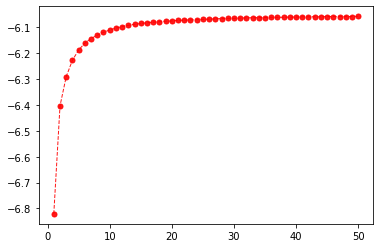

In [39]:
#import matplotlib.pyplot as plt
x = [i for i in range(1,51)]

plt.plot(x,logLike, color = "red" ,marker='o', linestyle='dashed',linewidth = 1,markersize = 5,alpha = 0.9)
plt.show()

In [40]:
m = max(logLike)
max_index = [i for i, j in enumerate(logLike) if j == m]

max_index

[49]

In [41]:
logLike[48:50], logLike[15],logLike[20]

([-6.059, -6.058], -6.083, -6.074)

How do you interpret your plot? What would be a reasonable choice for the number of passes? Retrain your LDA model with that number and re-inspect the topics it finds. Do you consider the new topics to be &lsquo;better&rsquo; than the ones that you got from the 1-pass model in Problem&nbsp;5?

### Analysis

From the plot above, it is clear that after a certain number of passes( more than 10), the likelihood does not change signifancly. Therefore a value close to 15 should be the optimal one. By the term optimal, we mean that provides a high log likelihood value, but also does not make the model more complicated or computational expensive. For example, the maximum value(as printed above) is for 48,49 passes but that numbers make the model more expensive. Therefore, we can choose 15 as the optimal number of passes.



### Train the Optimal LDA model

In [42]:
opt_passes = 15
Opt_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=num_topics,
    passes=opt_passes
)


In [43]:
top_topics = Opt_model.top_topics(corpus)
firstN = 10
pd.DataFrame({i:[topic for topic in top_topics[i][0][:firstN]] for i in range(num_topics)})

,0,1,2,3,4,5,6,7,8,9
0,"(0.07616353, child)","(0.03819304, america)","(0.024330353, policy)","(0.041645534, new)","(0.03162559, congress)","(0.04599714, people)","(0.053688128, year)","(0.058887314, school)","(0.09828385, health)","(0.034869365, woman)"
1,"(0.03717549, family)","(0.035835367, world)","(0.023880599, energy)","(0.040873628, america)","(0.030943846, federal)","(0.03430715, american)","(0.039287157, budget)","(0.037220232, community)","(0.059104513, care)","(0.02846766, let)"
2,"(0.028260766, work)","(0.030244047, year)","(0.019464584, soviet)","(0.02679306, peace)","(0.02999214, government)","(0.026949314, work)","(0.025542364, cut)","(0.028644903, new)","(0.050641775, american)","(0.027430907, thank)"
3,"(0.025314739, parent)","(0.025998933, american)","(0.017608682, nation)","(0.025792995, world)","(0.02709165, program)","(0.020315956, year)","(0.023851575, tax)","(0.026468458, education)","(0.04316469, president)","(0.023037525, family)"
4,"(0.023151498, job)","(0.024303798, nation)","(0.013469404, force)","(0.025002385, government)","(0.023408428, social)","(0.018766822, let)","(0.021784887, rate)","(0.019400798, year)","(0.041692816, health_care)","(0.020878782, credit)"
5,"(0.022226708, know)","(0.021659255, people)","(0.012951509, program)","(0.02167129, economy)","(0.020763319, reform)","(0.018147927, way)","(0.01850364, deficit)","(0.018463697, help)","(0.03520802, fellow)","(0.01975919, tax_credit)"
6,"(0.021293236, tax)","(0.017860785, tonight)","(0.012312631, national)","(0.018071348, century)","(0.018204425, year)","(0.017314201, crime)","(0.018015588, growth)","(0.018237062, teacher)","(0.034602337, member)","(0.0190401, year)"
7,"(0.019682452, million)","(0.017379686, state)","(0.012099611, major)","(0.016702743, nation)","(0.01719419, security)","(0.013369702, drug)","(0.0171856, economic)","(0.016497415, national)","(0.03210087, insurance)","(0.017215528, term)"
8,"(0.018232374, people)","(0.014828597, country)","(0.011640484, administration)","(0.014563746, community)","(0.016697904, social_security)","(0.012857484, time)","(0.016605586, percent)","(0.015411655, high)","(0.029428132, medicare)","(0.0155392, great)"
9,"(0.017439561, right)","(0.013213176, freedom)","(0.011535951, new)","(0.014294162, responsibility)","(0.01589161, legislation)","(0.012758722, college)","(0.016369749, spending)","(0.014073875, student)","(0.0229043, vice)","(0.015483962, american)"


### Analysis

Coefficients are much more accurate than previous results, but we stil have some repetitions even for high coefficients. Some of them are more clear, for example 7:education, 8:healt care, 6:budget/economy, 4:government, 0:child/parenting and so on.

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>